<a href="https://colab.research.google.com/github/abdullahamruf/Fish-Diseses/blob/main/fish_ensemble(4_base).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from tensorflow.keras.models import Model, load_model


from tensorflow.keras.layers import Input, Average
model_1 = load_model('/content/drive/MyDrive/fishinception-01-0.8090.hdf5')
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='name_of_model_1')

In [3]:
model_2 = load_model('/content/drive/MyDrive/fishdense-121-11-0.9719.hdf5')
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='name_of_model_2')

In [4]:
model_3 = load_model('/content/drive/MyDrive/EfficientNetB3-06-0.9831.hdf5')
model_3 = Model(inputs=model_3.inputs,
                outputs=model_3.outputs,
                name='name_of_model_3')

In [5]:
model_4 = load_model('/content/drive/MyDrive/fishresnet-50-23-0.9831.hdf5')
model_4 = Model(inputs=model_4.inputs,
                outputs=model_4.outputs,
                name='name_of_model_4')

In [6]:
from tensorflow.keras.models import Sequential


In [7]:
models = [model_1, model_2 ,model_3,model_4]
model_input = Input(shape=(299, 299, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [8]:
IMG_SIZE = (299, 299) # resolution

In [9]:
from tensorflow import keras

In [10]:
import tensorflow as tf
base_learning_rate = 0.001
ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           metrics=['accuracy'])

In [11]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tensorflow import keras
import glob as gb
import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D ,LeakyReLU

In [12]:
from tensorflow.keras.preprocessing import image_dataset_from_directory


BATCH_SIZE = 128

# Define the directories for training, testing, and validation
train_directory = '/content/drive/MyDrive/dataset/Fishtrain'
test_directory = '/content/drive/MyDrive/dataset/fishtest'
valid_directory = '/content/drive/MyDrive/dataset/Fishvalid'

# Create TensorFlow datasets
train_dataset = image_dataset_from_directory(
    train_directory,
    shuffle=True,
    labels='inferred',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    color_mode='rgb',
    seed=42
)

test_dataset = image_dataset_from_directory(
    test_directory,
    shuffle=True,
    labels='inferred',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    color_mode='rgb',
    seed=42
)

valid_dataset = image_dataset_from_directory(
    valid_directory,
    shuffle=True,
    labels='inferred',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    color_mode='rgb',
    seed=42
)

# Optional: You can also specify the class names if you have a specific order for your classes
class_names = train_dataset.class_names

# Print class names
print("Class Names:", class_names)

Found 1616 files belonging to 7 classes.
Found 199 files belonging to 7 classes.
Found 178 files belonging to 7 classes.
Class Names: ['Argulus', 'Broken antennae and rostrum', 'EUS', 'Healthy Fish', 'Redspot', 'THE BACTERIAL GILL ROT', 'Tail And Fin Rot']


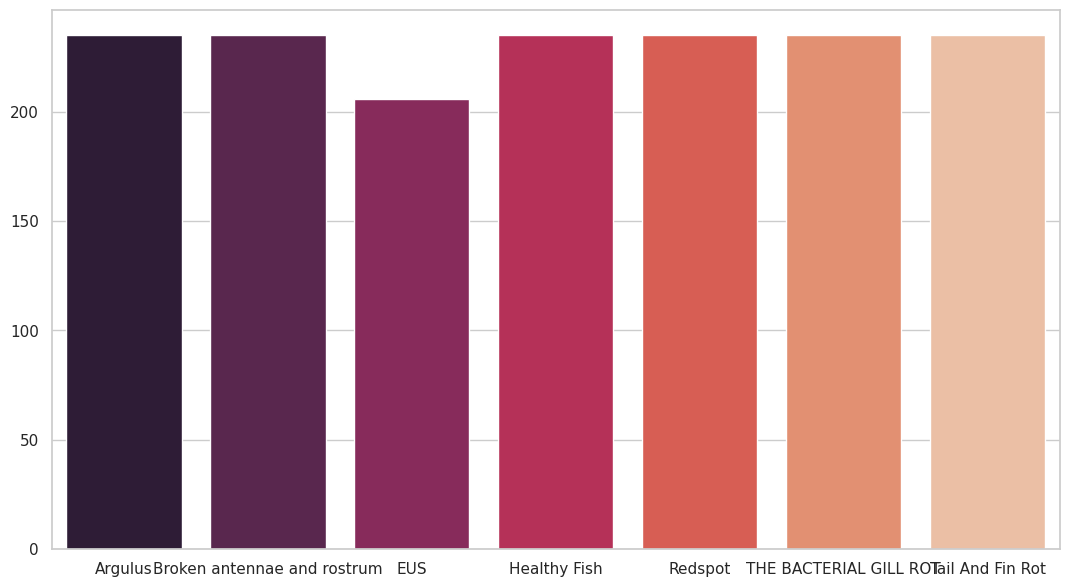

In [13]:
sns.set_theme(style="whitegrid")
Data_imbalance = []
for folder in os.listdir(train_directory):
    files = gb.glob(pathname=str(train_directory + "/" + folder +"/*.*"))
    Data_imbalance.append(len(files))
plt.figure(figsize=(13,7))
sns.barplot(x=[ "Argulus", "Broken antennae and rostrum", "EUS", "Healthy Fish","Redspot","THE BACTERIAL GILL ROT","Tail And Fin Rot"], y=Data_imbalance, palette="rocket")
plt.show()

In [14]:
total = 0
for i in range(0,len(Data_imbalance)) :
    total +=Data_imbalance[i]

weight_for_0 = (1 / Data_imbalance[0]) * (total / 7.0)
weight_for_1 = (1 / Data_imbalance[1]) * (total / 7.0)
weight_for_2 = (1 / Data_imbalance[2]) * (total / 7.0)
weight_for_3 = (1 / Data_imbalance[3]) * (total / 7.0)
weight_for_4 = (1 / Data_imbalance[4]) * (total / 7.0)
weight_for_5 = (1 / Data_imbalance[5]) * (total / 7.0)
weight_for_6 = (1 / Data_imbalance[6]) * (total / 7.0)

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3,4: weight_for_4,5: weight_for_5,6: weight_for_6}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))
print('Weight for class 3: {:.2f}'.format(weight_for_3))
print('Weight for class 4: {:.2f}'.format(weight_for_4))
print('Weight for class 5: {:.2f}'.format(weight_for_5))
print('Weight for class 6: {:.2f}'.format(weight_for_6))

Weight for class 0: 0.98
Weight for class 1: 0.98
Weight for class 2: 1.12
Weight for class 3: 0.98
Weight for class 4: 0.98
Weight for class 5: 0.98
Weight for class 6: 0.98


In [15]:
history = ensemble_model.fit(train_dataset , verbose=2 , epochs=13,class_weight=class_weight,
                               validation_data=valid_dataset , use_multiprocessing= True )

Epoch 1/13
13/13 - 749s - loss: 0.3010 - accuracy: 0.9722 - val_loss: 0.3499 - val_accuracy: 0.9663 - 749s/epoch - 58s/step
Epoch 2/13
13/13 - 42s - loss: 0.2282 - accuracy: 0.9845 - val_loss: 0.2845 - val_accuracy: 0.9607 - 42s/epoch - 3s/step
Epoch 3/13
13/13 - 41s - loss: 0.1766 - accuracy: 0.9827 - val_loss: 0.1914 - val_accuracy: 0.9607 - 41s/epoch - 3s/step
Epoch 4/13
13/13 - 42s - loss: 0.0881 - accuracy: 0.9839 - val_loss: 0.1456 - val_accuracy: 0.9551 - 42s/epoch - 3s/step
Epoch 5/13
13/13 - 42s - loss: 0.0887 - accuracy: 0.9777 - val_loss: 0.1442 - val_accuracy: 0.9719 - 42s/epoch - 3s/step
Epoch 6/13
13/13 - 42s - loss: 0.0880 - accuracy: 0.9734 - val_loss: 0.1580 - val_accuracy: 0.9663 - 42s/epoch - 3s/step
Epoch 7/13
13/13 - 41s - loss: 0.0795 - accuracy: 0.9790 - val_loss: 0.1573 - val_accuracy: 0.9607 - 41s/epoch - 3s/step
Epoch 8/13
13/13 - 41s - loss: 0.0812 - accuracy: 0.9771 - val_loss: 0.1785 - val_accuracy: 0.9551 - 41s/epoch - 3s/step
Epoch 9/13
13/13 - 41s - loss

In [16]:
ensemble_model.evaluate(test_dataset , verbose = 1)

2/2 [==============================] - 107s 33s/step - loss: 0.9207 - accuracy: 0.8291


[0.9207161068916321, 0.8291457295417786]

In [17]:
class_names = train_dataset.class_names
class_names

['Argulus',
 'Broken antennae and rostrum',
 'EUS',
 'Healthy Fish',
 'Redspot',
 'THE BACTERIAL GILL ROT',
 'Tail And Fin Rot']

1/1 [==============================] - 0s 68ms/step


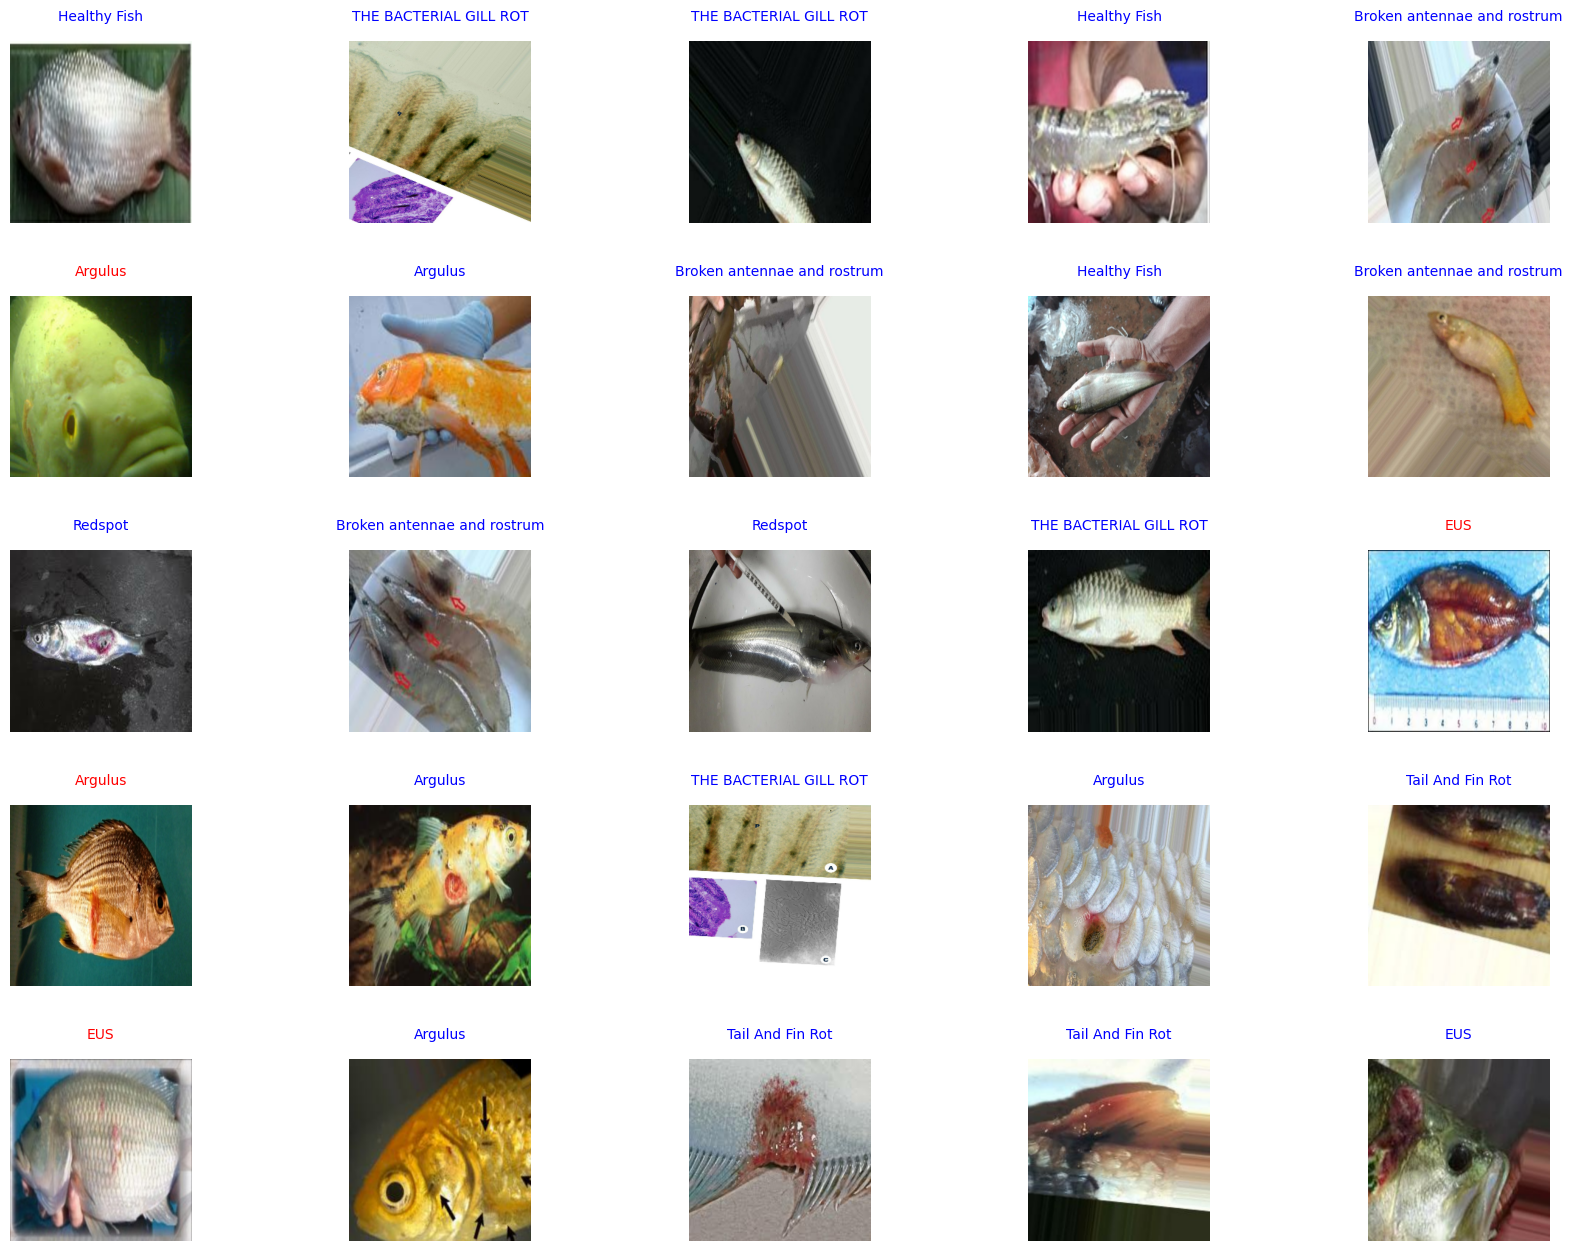

In [18]:
plt.figure(figsize=(20, 15))
for images, labels in test_dataset.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        im2 = images[i].numpy().astype("uint8")
        img2 = tf.expand_dims(im2, 0)
        predict = ensemble_model.predict(img2)
        predicted= class_names[np.argmax(predict)]
        actual = class_names [labels[i].numpy().astype("uint8")]
        if (actual == predicted):
            plt.title(predicted, fontsize=10, color= 'blue', pad=15);
        else :
            plt.title(actual, fontsize=10, color= 'red' ,pad=15);
        plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9,
                            top=0.9, wspace=0.4,hspace=0.4)

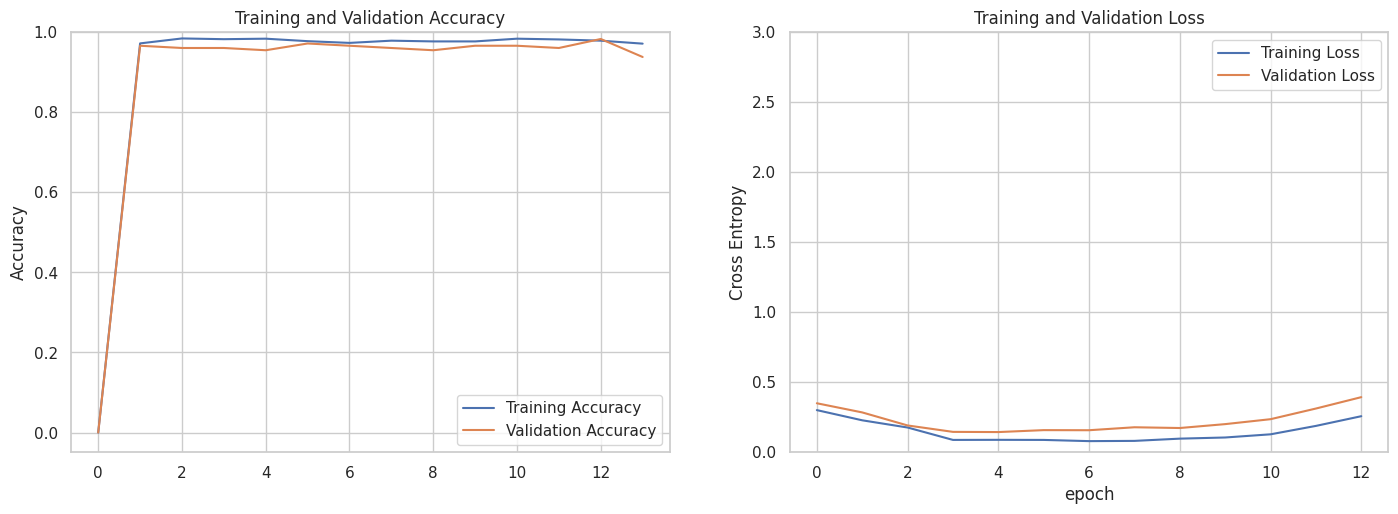

In [19]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

3/3 [==============================] - 18s 5s/step


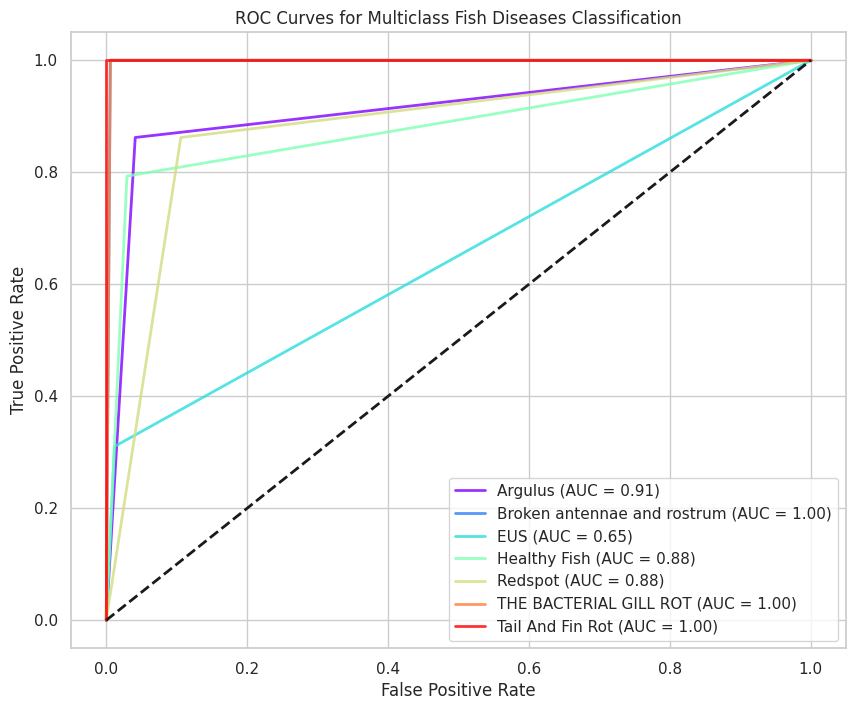

ROC AUC for Argulus: 0.9104
ROC AUC for Broken antennae and rostrum: 0.9971
ROC AUC for EUS: 0.6493
ROC AUC for Healthy Fish: 0.8818
ROC AUC for Redspot: 0.8781
ROC AUC for THE BACTERIAL GILL ROT: 0.9971
ROC AUC for Tail And Fin Rot: 1.0000
                             precision    recall  f1-score   support

                    Argulus       0.78      0.86      0.82        29
Broken antennae and rostrum       0.96      1.00      0.98        25
                        EUS       0.82      0.31      0.45        29
               Healthy Fish       0.82      0.79      0.81        29
                    Redspot       0.58      0.86      0.69        29
     THE BACTERIAL GILL ROT       0.97      1.00      0.98        29
           Tail And Fin Rot       1.00      1.00      1.00        29

                   accuracy                           0.83       199
                  macro avg       0.85      0.83      0.82       199
               weighted avg       0.84      0.83      0.82       19

In [20]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset and make predictions
for images, labels in test_dataset:
    predictions = ensemble_model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Binarize the true and predicted labels
true_labels_bin = label_binarize(true_labels, classes=np.unique(true_labels))
predicted_labels_bin = label_binarize(predicted_labels, classes=np.unique(predicted_labels))

# Compute class-specific ROC AUC values
roc_auc_per_class = []
for i in range(len(class_names)):
    roc_auc = roc_auc_score(true_labels_bin[:, i], predicted_labels_bin[:, i])
    roc_auc_per_class.append(roc_auc)

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Plot class-specific ROC curves with different colors and line styles
plt.figure(figsize=(10, 8))

colors = plt.cm.rainbow(np.linspace(0, 1, len(class_names)))

for i, color in zip(range(len(class_names)), colors):
    fpr, tpr, _ = roc_curve(true_labels_bin[:, i], predicted_labels_bin[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(
        fpr, tpr,
        label=f'{class_names[i]} (AUC = {roc_auc:.2f})',
        color=color,
        linestyle='-',  # You can customize line styles here
        linewidth=2,  # You can customize line width here
        alpha=0.8  # You can customize transparency here
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Fish Diseases Classification')
plt.legend(loc='lower right')
plt.grid(True)  # Add a grid for better readability
plt.show()

# Print class-specific ROC AUC values
for i in range(len(class_names)):
    print(f'ROC AUC for {class_names[i]}: {roc_auc_per_class[i]:.4f}')

# Print the classification report
print(report)


In [21]:
class_names = train_dataset.class_names
class_names

['Argulus',
 'Broken antennae and rostrum',
 'EUS',
 'Healthy Fish',
 'Redspot',
 'THE BACTERIAL GILL ROT',
 'Tail And Fin Rot']

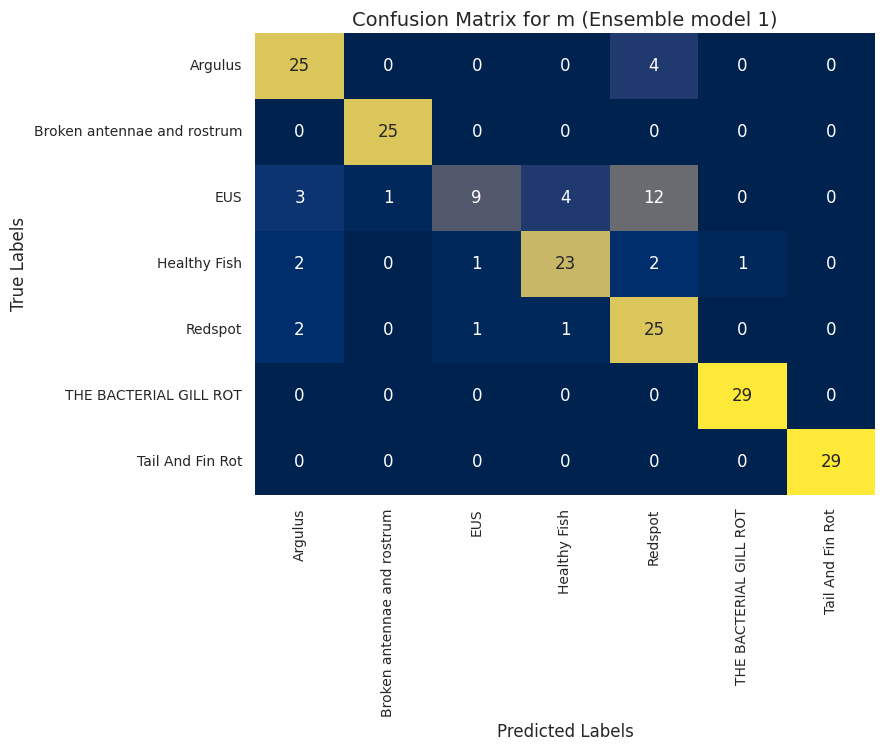

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Set a custom color palette (cividis is a good choice for accessibility)
custom_palette = sns.color_palette("cividis", as_cmap=True)

# Plot the confusion matrix as a heatmap with custom styling
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_palette, xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix for m (Ensemble model 1)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [23]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(true_labels, predicted_labels)
print(f'Cohen\'s Kappa: {kappa:.4f}')


Cohen's Kappa: 0.8006


In [24]:
from sklearn.metrics import matthews_corrcoef
import numpy as np

# Assuming true_labels and predicted_labels are your multiclass labels
mcc_values = [matthews_corrcoef(true_labels == i, predicted_labels == i) for i in np.unique(true_labels)]

average_mcc = np.mean(mcc_values)
print(f'Average Matthews Correlation Coefficient for Multiclass: {average_mcc:.4f}')



Average Matthews Correlation Coefficient for Multiclass: 0.8044


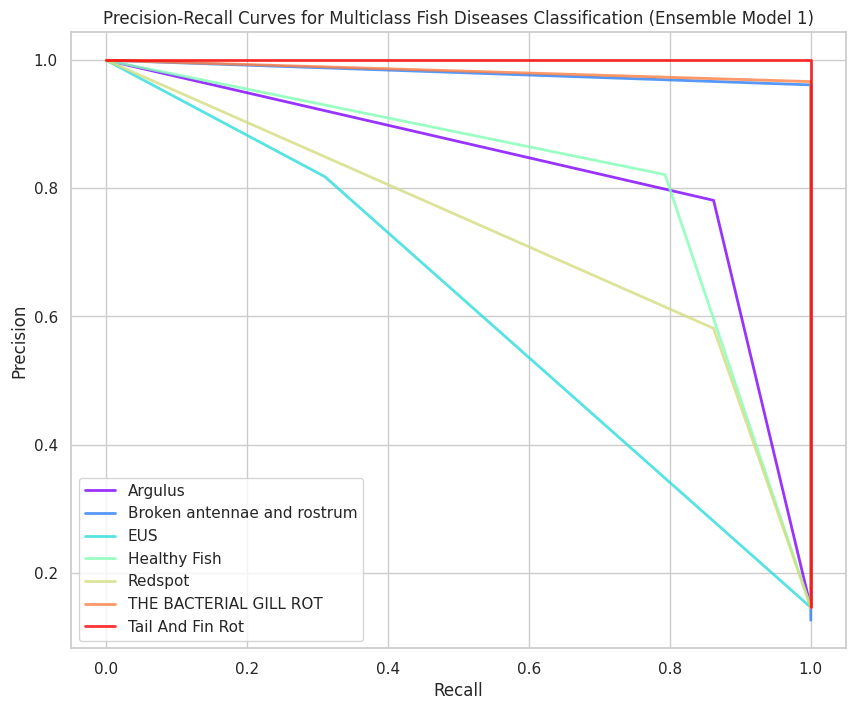

In [25]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 8))

for i, color in zip(range(len(class_names)), colors):
    precision, recall, _ = precision_recall_curve(true_labels_bin[:, i], predicted_labels_bin[:, i])
    plt.plot(
        recall, precision,
        label=f'{class_names[i]}',
        color=color,
        linestyle='-',
        linewidth=2,
        alpha=0.8
    )

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Multiclass Fish Diseases Classification (Ensemble Model 1)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


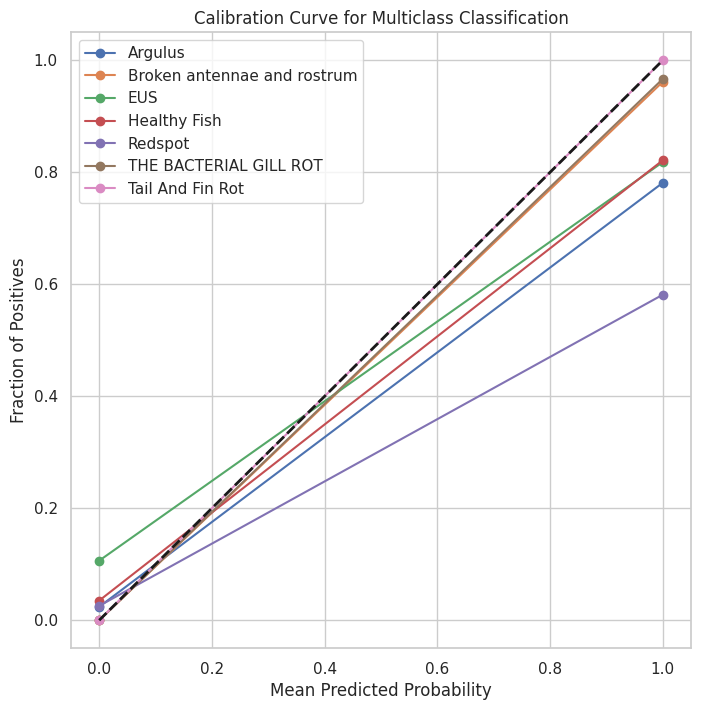

In [26]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(8, 8))

for i in range(len(class_names)):
    prob_true, prob_pred = calibration_curve(true_labels_bin[:, i], predicted_labels_bin[:, i], n_bins=10, strategy='uniform')
    plt.plot(prob_pred, prob_true, marker='o', label=f'{class_names[i]}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve for Multiclass Classification')
plt.legend(loc='upper left')
plt.show()


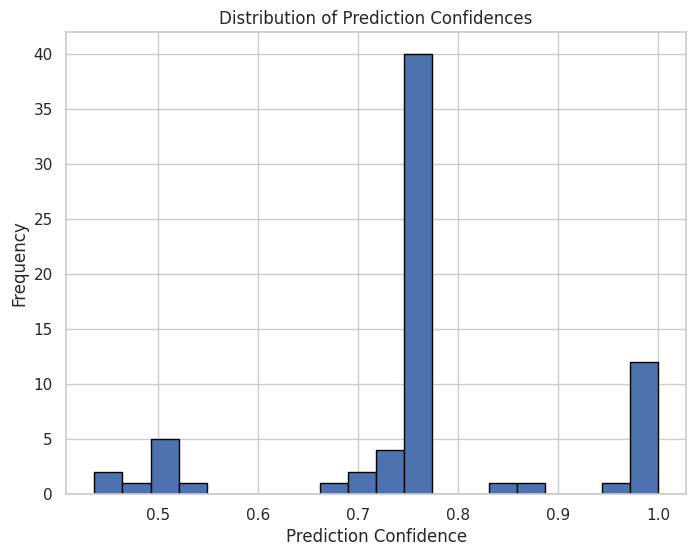

In [27]:
# Assuming predictions is a matrix of predicted probabilities for each class
prediction_confidences = np.max(predictions, axis=1)

# Plot histogram of prediction confidences
plt.figure(figsize=(8, 6))
plt.hist(prediction_confidences, bins=20, edgecolor='black')
plt.xlabel('Prediction Confidence')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Confidences')
plt.show()
